## EE5175 -Image Signal Processing
### Lab-4

### Space-invariant Blurring

###### importing libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from skimage.io import imread 
import os
import math as m

###### given image

In [2]:
img = imread('./Mandrill.png')

###### plot the given image

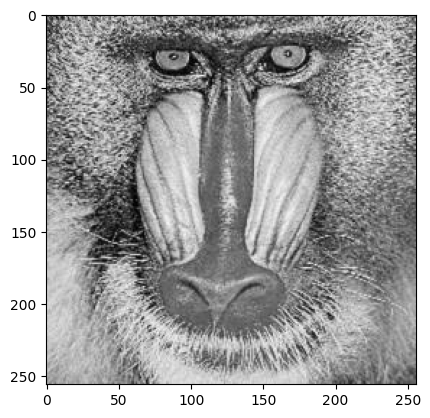

In [3]:
plt.imshow(img,'gray')

#### Gaussian Kernel

* input args - sigma value ($\sigma$)
* return kernel 
$$
G(i, j) = \frac{1}{2\pi\sigma^{2}}e^{\frac{-i^{2}-j^{2}}{2\sigma^{2}}}
$$

* normalize it by taking the sum of the kernel

In [4]:
def gaussian_kernel(sigma):
    
    w = np.ceil(6 * sigma + 1)  #window size for a given sigma 
    
    d = int(w//2)   # d = integer value of the window size / 2 
    w = int(w)     #float 64 to integer 
    kernel_cal = np.zeros((w,w)) #create the zeros of the size of the window
    
    if w == 1 :
        return np.ones((w,w))
    
    for i in range(w):
        for j in range(w):
            kernel_cal[i, j] = np.exp((-(i-d)**2-(j-d)**2)/(2*(sigma**2)))

    kernel_cal_normalised = kernel_cal / kernel_cal.sum()
#     plt.imshow(kernel_cal_normalised)
    return kernel_cal_normalised

### 2D Convolution 

In [5]:
def conv_2d(img , sigma ,plot_kernel = True ):
    x,y = img.shape
    w = np.ceil(6 * sigma + 1)  #get the window size 
#     print(w)
    d = int(w//2)
#     print(d)

    if d == 0 :           
        return img   ## had to make this case , caused an error , bcoz window of size zero is same as original image 
    
    #making of zeros padded image 
    zero_padded_image = np.zeros((x+2*d, y+2*d))  #making a zeros of size (x+2*d)
    zero_padded_image[d:-d, d:-d] = img   #making the image go to the centre 

    if plot_kernel:   #jst plotting the kernels in case to see how it comes out 
        blur_kernel = gaussian_kernel_plot(sigma)
    else:
        blur_kernel = gaussian_kernel(sigma)
    
    final_image = np.zeros((x, y))
    
    for i in range(d, x+d):
        for j in range(d, y+d):
            # Extract the required image patch, multiply it with the kernel,
            # sum up the values and store it in the filtered_image array
            result = zero_padded_image[i-d:i+d+1, j-d:j+d+1]
            final_image[i-d, j-d] = np.sum(blur_kernel*result)
            
    return final_image

In [6]:
sigma_list = [0,0.3,0.6,1,1.2,1.6]

#### Plot of the gaussian kernels

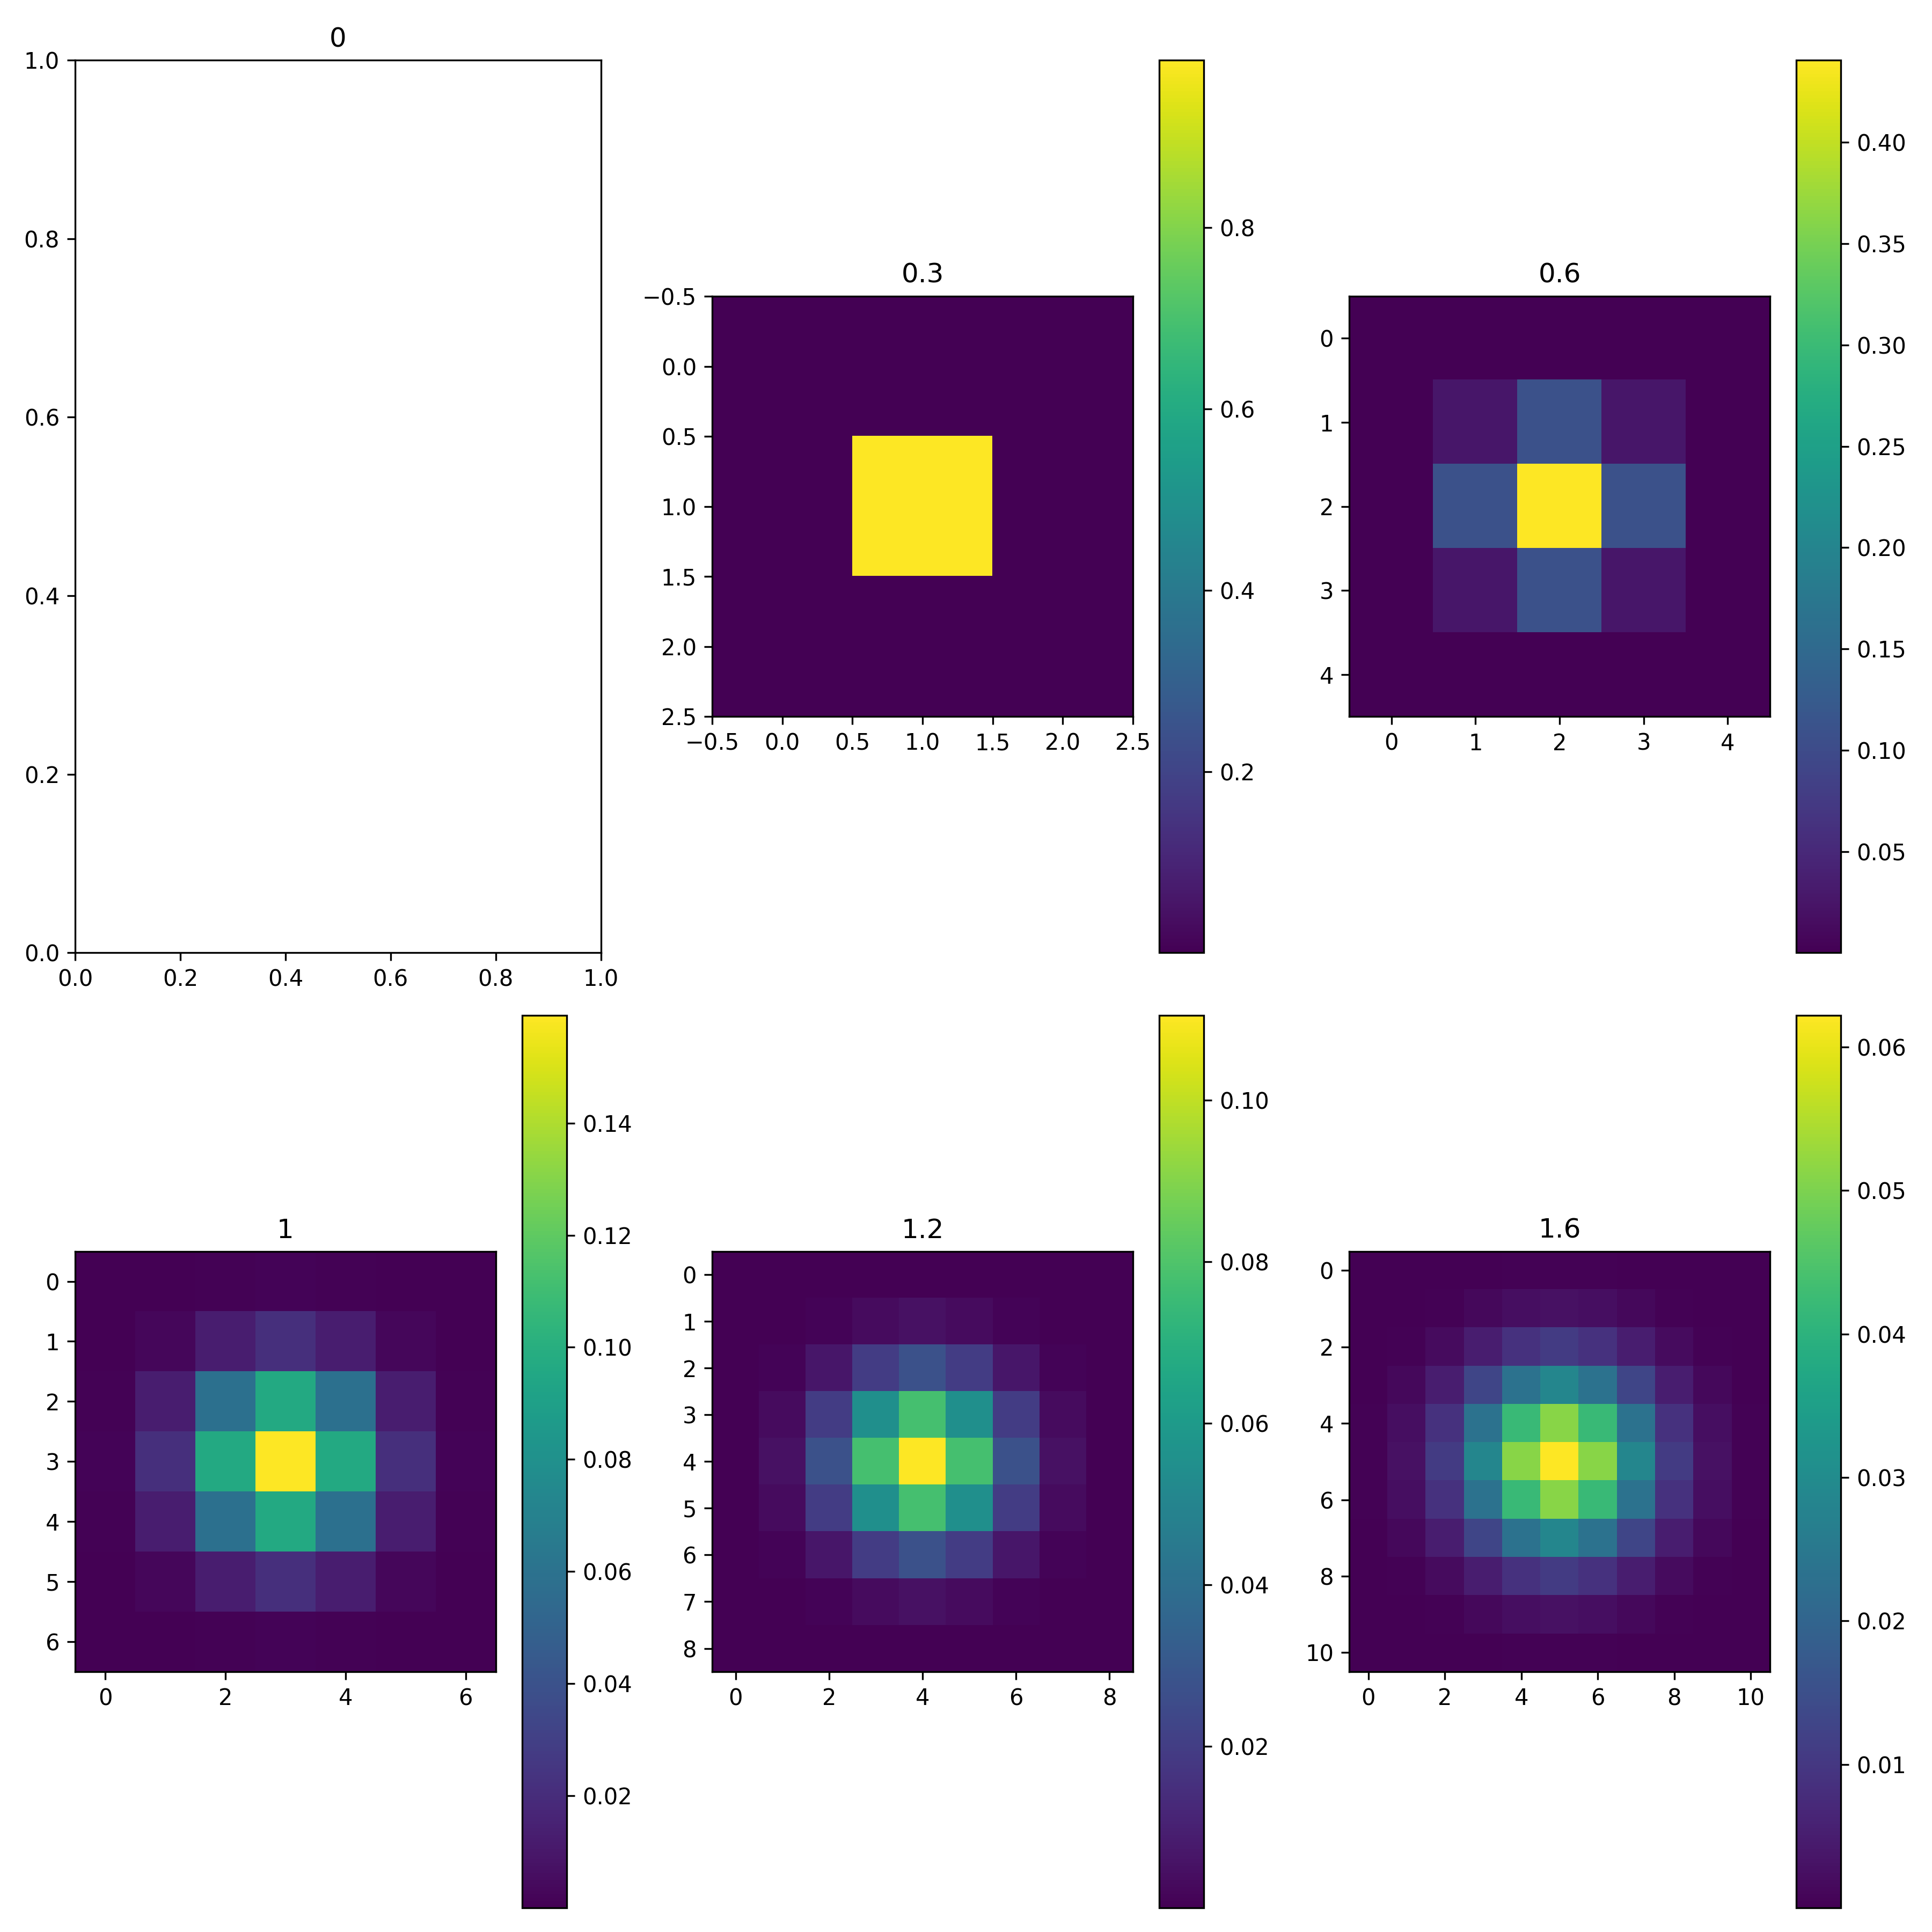

## Plot of the  Gaussian blurring on Mandrill

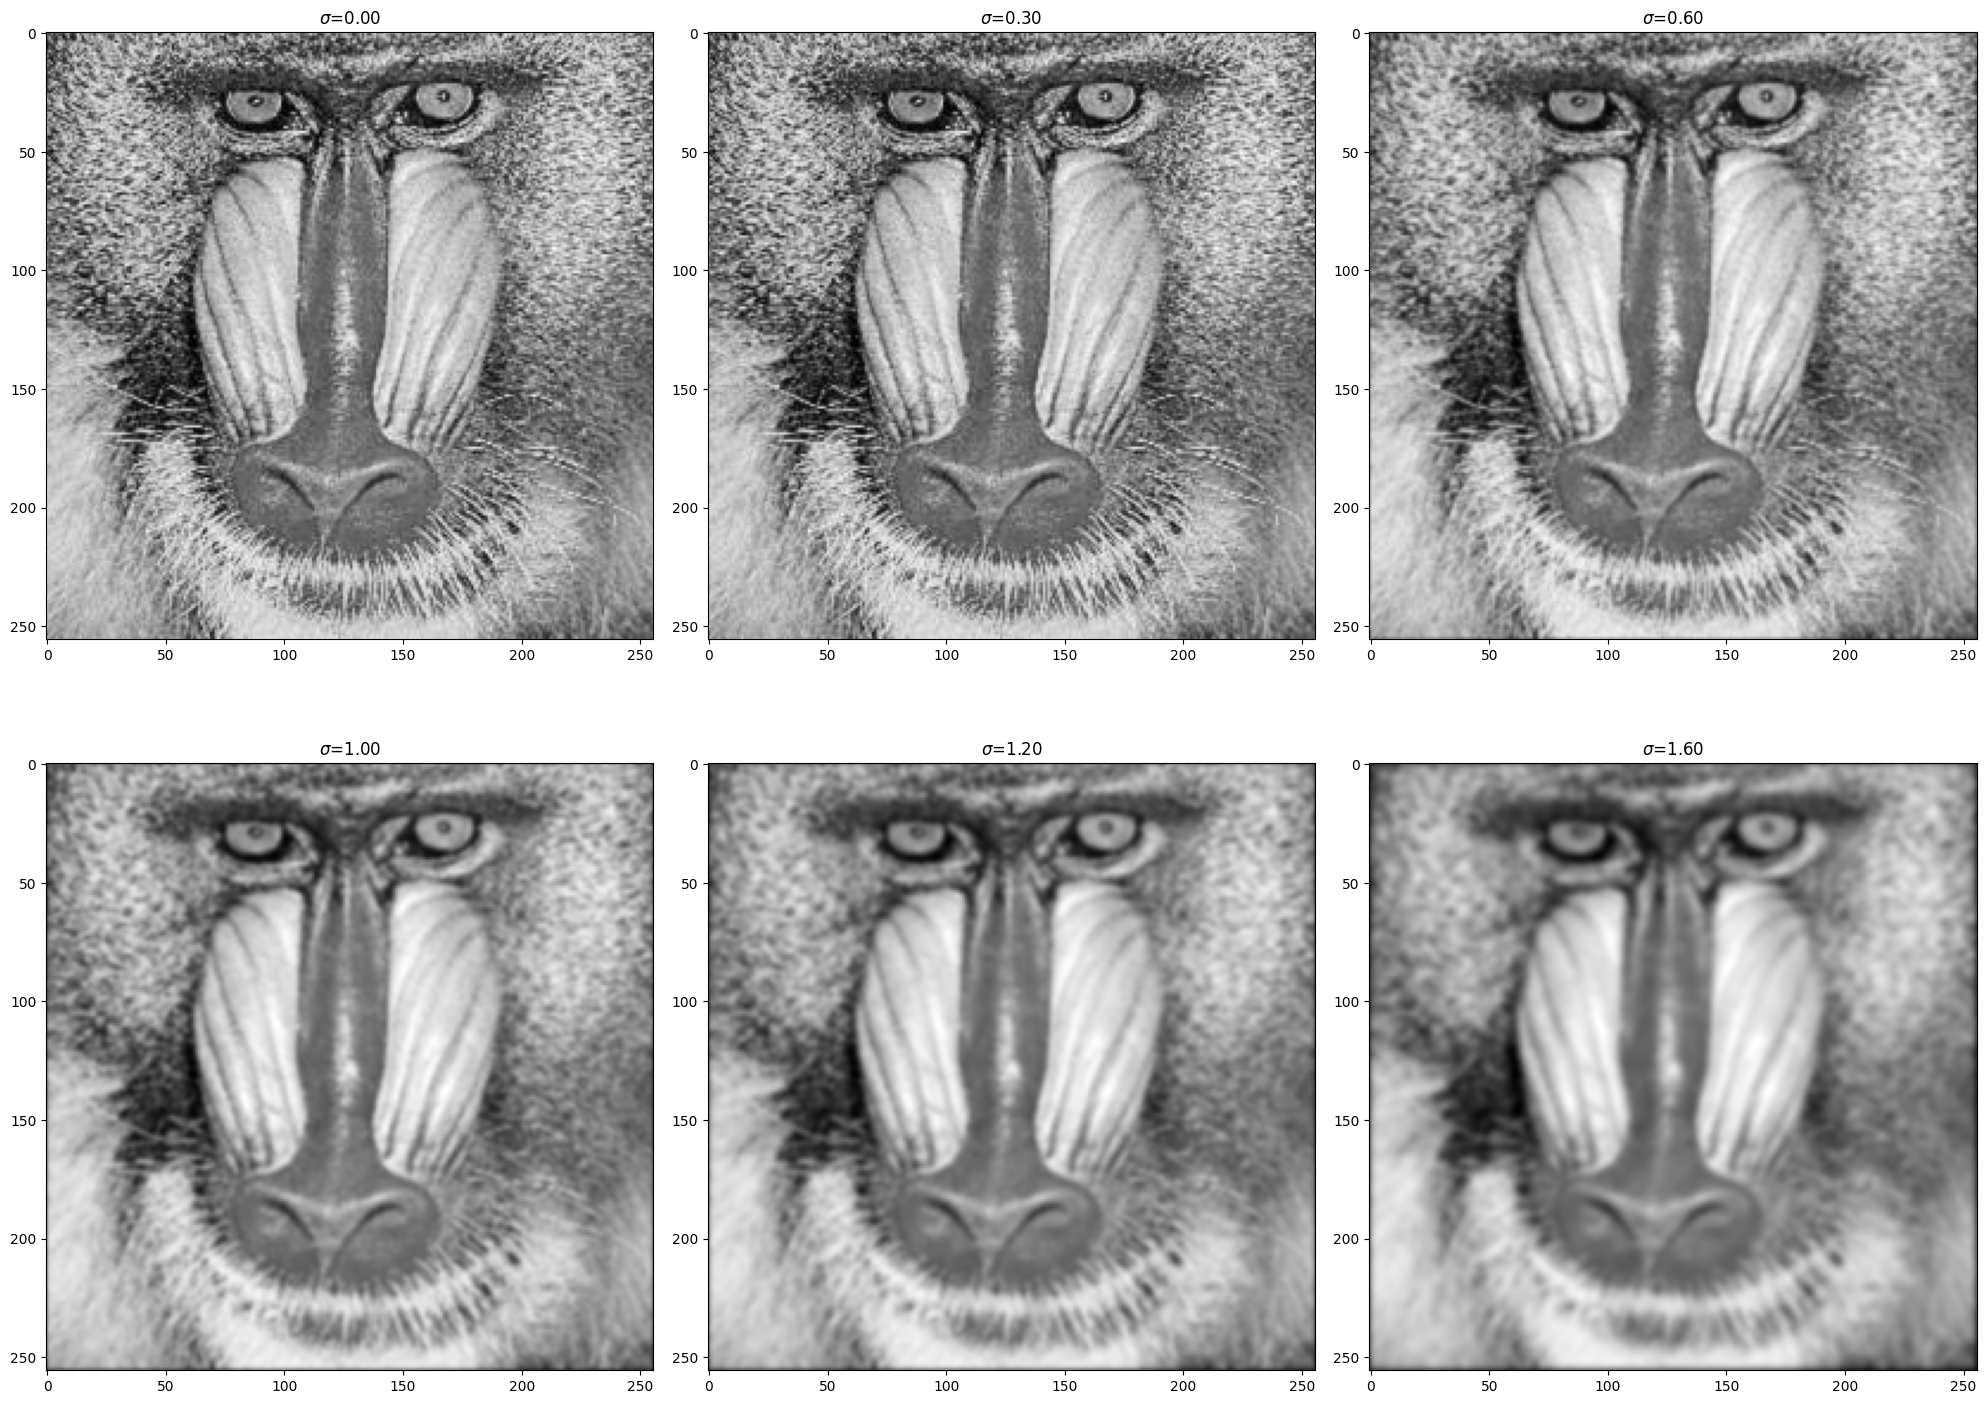

In [9]:
plt.figure(figsize=(20,15))
rows = int(2)
for i in range(len(sigma_list)):
    plt.subplot(rows,3,i+1)
    op = conv_2d(img,sigma_list[i],False)
    plt.title(r'$\sigma$=%0.2f'%(sigma_list[i]))
    plt.imshow(op , cmap = 'gray')
plt.tight_layout()

### Conclusions
* Higher the value of the $\sigma$ higher is the blur
* since it is a space invariant blur we can use the convolution 
* convolution and correlation for gaussian kernel gives the same result 
* no blur at $\sigma$ = 0
* gaussian filtering looks like a low pass filterng , where the edges are faded 